## Introduction

Here we're going to try create groups to a customer data using hierarchical clustering and then analyze the difference between them.

## Setup

Packages and data read.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as srn
import statistics  as sts
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep = '\t') 
data.index = data.ID 
data = data.drop(columns = 'ID')
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Data Adjust

Here we find some problems with the data and then adjust to a better manipulation in the next steps


In [4]:
agrupado = data.groupby(['Education']).size()
agrupado

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
dtype: int64

In [5]:
agrupado = data.groupby(['Marital_Status']).size()
agrupado

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
dtype: int64

In [6]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
mediana = sts.median(data['Income'])
data['Income'].fillna(mediana, inplace=True)

In [8]:
data['Age'] = 2021 - data['Year_Birth']
data = data.drop(columns = 'Year_Birth')

data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'Relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

data['No_Children'] = data['Kidhome'] + data['Teenhome']
data = data.drop(columns = ['Kidhome','Teenhome'])

data['Campaings_Accepted'] = data['AcceptedCmp3'] + data['AcceptedCmp4'] + data[ 'AcceptedCmp5'] + data[ 'AcceptedCmp1'] + data[ 'AcceptedCmp2']
data = data.drop(columns = ['AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'])

data['Total_Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data[ 'MntGoldProds']
data = data.drop(columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

## Exploratory 

Here we can see some features and then remove some outliers if finded.

Income


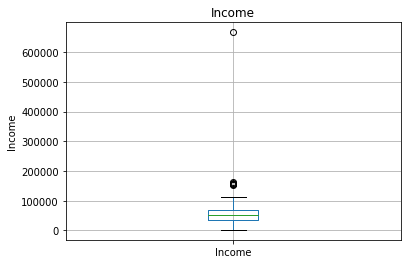

Z_CostContact


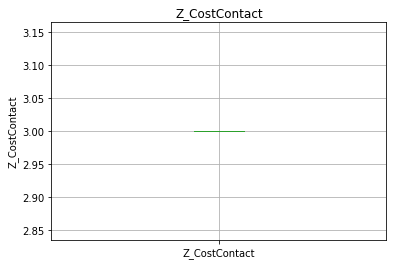

Z_Revenue


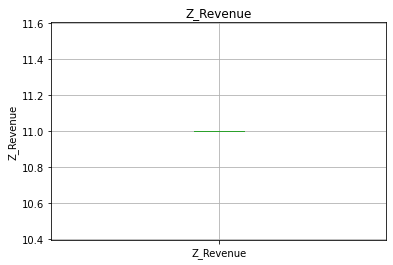

Age


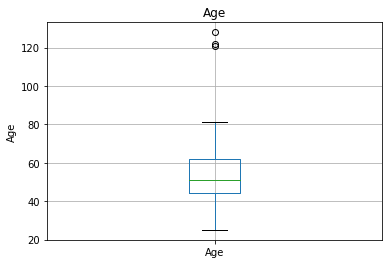

Total_Spent


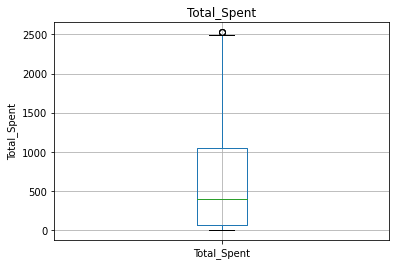

In [9]:
for feature in data:
    data=data.copy()
    if data[feature].dtype!='O' and feature not in ['Dt_Customer'] and 0 not in data[feature].unique():
        print(feature)
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

<AxesSubplot:xlabel='Campaings_Accepted', ylabel='Total_Spent'>

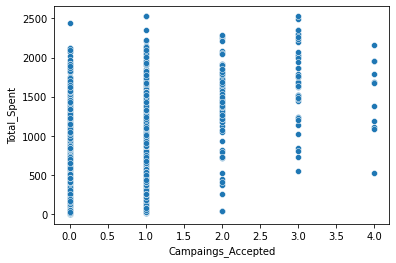

In [10]:
sns.scatterplot(x="Campaings_Accepted",y="Total_Spent",data=data)

<AxesSubplot:xlabel='No_Children', ylabel='Income'>

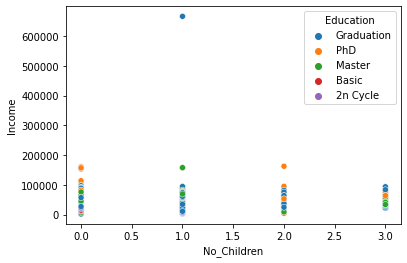

In [11]:
sns.scatterplot(x="No_Children",y="Income",hue="Education",data=data)

<AxesSubplot:xlabel='Recency', ylabel='Total_Spent'>

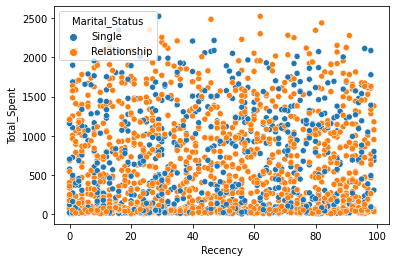

In [12]:
sns.scatterplot(x="Recency",y="Total_Spent",hue="Marital_Status",data=data)

<AxesSubplot:>

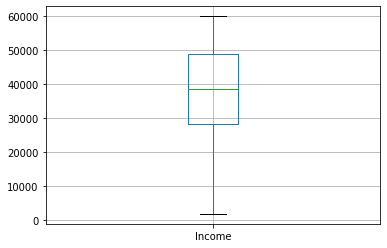

In [13]:
data = data[data["Income"] < 60000 ]
data.boxplot(column = 'Income')

<AxesSubplot:xlabel='No_Children', ylabel='Income'>

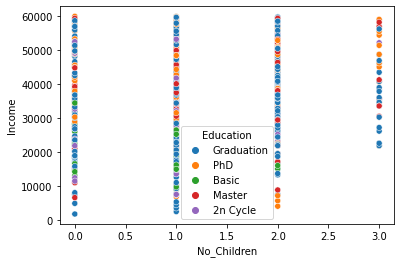

In [14]:
sns.scatterplot(x="No_Children",y="Income",hue="Education",data=data)

## Clustering

In [15]:
data.dtypes

Education               object
Marital_Status          object
Income                 float64
Dt_Customer             object
Recency                  int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Age                      int64
No_Children              int64
Campaings_Accepted       int64
Total_Spent              int64
dtype: object

In [16]:
selected_data = data.select_dtypes(np.number)

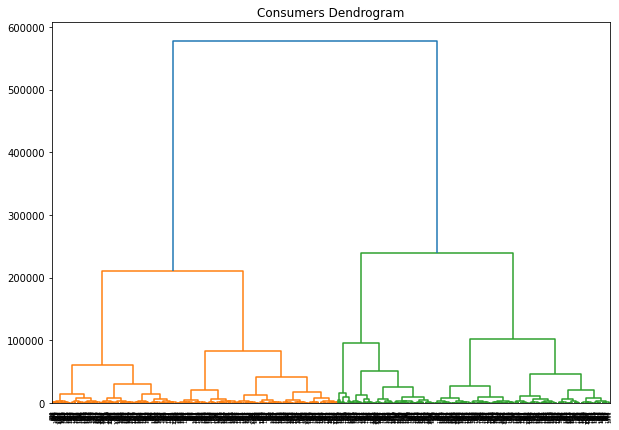

In [17]:
plt.figure(figsize=(10, 7))
plt.title("Consumers Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

Based in this dendogram i resolve to use 2 clusters and then analyze the data between this two groups.

In [18]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(selected_data) 
print(labels)

[1 1 0 ... 0 1 1]


With the groups created i use a new variable and then enconded to change from numerical type.

In [19]:
selected_data['Cluster'] = labels

# Apply label encoder to each column with categorical data
encoder = LabelEncoder()
cols_encoded = pd.DataFrame(encoder.fit_transform(selected_data['Cluster']))

#indexing
cols_encoded.index = selected_data.index

cols_encoded.columns = ['Cluster_enc']

# Add one-hot encoded columns to numerical features
selected_data = pd.concat([selected_data, cols_encoded], axis=1)
selected_data = selected_data.drop(columns = 'Cluster')

selected_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Age,No_Children,Campaings_Accepted,Total_Spent,Cluster_enc
ID,,,,,,,,,,,,,,,,
5524,58138.0,58,3,8,10,4,7,0,3,11,1,64,0,0,1617,1
2174,46344.0,38,2,1,1,2,5,0,3,11,0,67,2,0,27,1
6182,26646.0,26,2,2,0,4,6,0,3,11,0,37,1,0,53,0
5324,58293.0,94,5,5,3,6,5,0,3,11,0,40,1,0,422,1
965,55635.0,34,4,7,3,7,6,0,3,11,0,50,1,0,590,1


<AxesSubplot:xlabel='No_Children', ylabel='Income'>

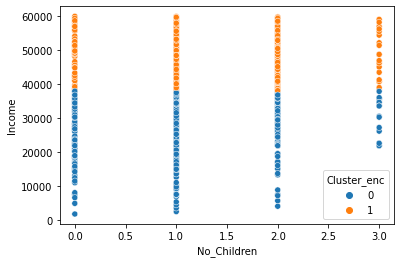

In [20]:
sns.scatterplot(x="No_Children",y="Income",hue="Cluster_enc",data=selected_data)

We can see a really difference between cluster in this plot. 

<AxesSubplot:xlabel='Recency', ylabel='Total_Spent'>

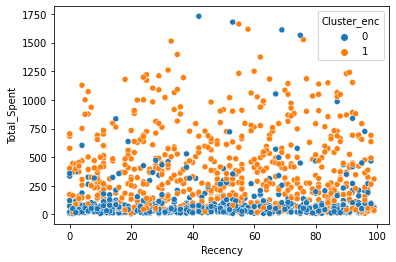

In [21]:
sns.scatterplot(x="Recency",y="Total_Spent",hue="Cluster_enc",data=selected_data)

I didn't like the result od this plot, but we can see a difference in what was spent between the two clusters, of course this is goint to be related with the income variable, but its a worthy analysis.

<AxesSubplot:xlabel='Campaings_Accepted', ylabel='Total_Spent'>

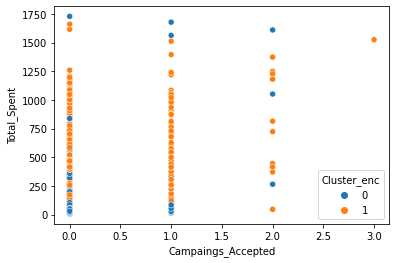

In [22]:
sns.scatterplot(x="Campaings_Accepted",y="Total_Spent",hue='Cluster_enc',data=selected_data)

And this plot i think that don't show well the difference of Accepted campaigns so i try a barplot and then we can see that have great difference.

<AxesSubplot:xlabel='Cluster_enc', ylabel='Campaings_Accepted'>

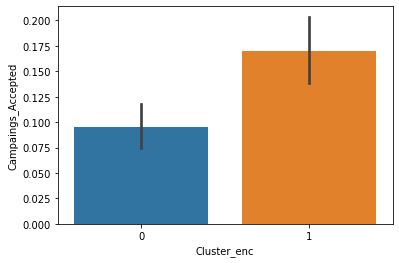

In [23]:
sns.barplot(x="Cluster_enc",y="Campaings_Accepted",data=selected_data)